## Local Outlier Factor Detection (Unsupervised)

### Demo uses two data sets, one labeleled and one unlabeled, but unlike the supervised demo the labeled data is not used to process the unlabeled data. The labeled data is just used to demonstrate results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from sklearn.neighbors import LocalOutlierFactor

%matplotlib inline

In [2]:
def compute_precision(true_positives, false_positives):
    if (true_positives + false_positives) != 0:
        precision = true_positives / (true_positives + false_positives)
    else:
        precision = 0
    return precision

In [3]:
def compute_recall(true_positives, false_negatives):
    if (true_positives + false_negatives) != 0:
        recall = true_positives / (true_positives + false_negatives)
    else:
        recall = 0
    return recall

In [4]:
def compute_f1(precision, recall):
    if (precision + recall) != 0:
        f1 = 2 * precision * recall / (precision + recall)
    else:
        f1 = 0
    return f1

In [5]:
def read_matlab_data(file_name):
    data = spio.loadmat(file_name)
    return data

In [30]:
def run_labeled_data():
    small_data = read_matlab_data('../data/server_latency_throughput.mat')
    x_cross_validation = small_data.get('Xval')
    y_val = small_data.get('yval')
    number_outliers = y_val.sum()
    print("Cross validation outlier count: ", number_outliers)
    error_boundary_index = int( y_val.shape[0] - number_outliers)
    temp = np.concatenate((x_cross_validation, y_val), axis=1)
    last_column = temp.shape[1] - 1
    # sort by last column
    temp = temp[temp[:, last_column].argsort()]
    x_cross_sorted = temp[:, :last_column]
    y_val_sorted = temp[:, last_column]
    y_val_sorted = np.reshape(y_val_sorted, y_val_sorted.shape[0])
    y_val_sorted = np.asanyarray(y_val_sorted, dtype=np.int64)

    # change outliers to -1, inliers to 1
    y_val_sorted[y_val_sorted == 1] = -1
    y_val_sorted[y_val_sorted == 0] = 1

    model = LocalOutlierFactor(n_neighbors=20)
    y_predict = model.fit_predict(x_cross_sorted)
    outliers = np.where(y_predict == -1)
    inliers = np.where(y_predict == 1)
    print("Number of predicted inliers= ", inliers[0].size)
    print("Number of predicted outliers= ", outliers[0].size)

    errors = y_val_sorted != y_predict
    print("Training errors= ", (errors == True).sum())

    # the first error_boundary_index rows correspond to inliers

    # false positives- inliers predicted as outliers
    false_positives = (y_predict[:error_boundary_index] == -1).sum()
    print("false positives= ", false_positives)

    # false negatives- outliers predicted as inliers
    false_negatives = (y_predict[ error_boundary_index:] == 1).sum()
    print("false negatives= ", false_negatives)

    # true positives - outliers predicted to be outliers
    true_positives = (y_predict[error_boundary_index:] == -1).sum()
    print("true positives= ", true_positives)
    precision = compute_precision(true_positives, false_positives)
    recall = compute_recall(true_positives, false_negatives)
    f1 = compute_f1(precision, recall)
    print("F1 = ", f1)
    print("Precision = ", f1)
    print("Recall = ", f1)
    n = np.arange(0, 35.5, 0.5)
    xx, yy = np.meshgrid(n, n)
    Z = model._decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.rcParams["figure.figsize"] = (15,15)

    plt.title("Local Outlier Factor (LOF) Labeled Data")
   
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    in_data = plt.scatter(x_cross_sorted[inliers, 0], x_cross_sorted[inliers, 1], c='white',
                          edgecolor='k', s=20, label='inliers')

    out_data = plt.scatter(x_cross_sorted[outliers, 0], x_cross_sorted[outliers, 1], c='red',
                           edgecolor='k', s=20, label='outliers')

    error_plot, = plt.plot(x_cross_sorted[errors, 0], x_cross_sorted[errors, 1],
                           'ro', mfc='none', linewidth=2, markersize=10, label="error")

    plt.legend(handles=[in_data, out_data, error_plot], loc="upper left")



In [26]:
def run_samples():
    small_data = read_matlab_data('../data/server_latency_throughput.mat')

    X = small_data.get('X')
    model = LocalOutlierFactor(n_neighbors=20)
    y_predict = model.fit_predict(X)
    outliers = np.where(y_predict == -1)
    inliers = np.where(y_predict == 1)
    print("Number of inliers= ", inliers[0].size)
    print("Number of outliers= ", outliers[0].size)

    n = np.arange(0, 35.5, 0.5)
    xx, yy = np.meshgrid(n, n)
    Z = model._decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.rcParams["figure.figsize"] = (7,7) 
    plt.title("Local Outlier Factor (LOF)")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    in_data = plt.scatter(X[inliers, 0], X[inliers, 1], c='white',
                          edgecolor='k', s=20, label='inliers')

    out_data = plt.scatter(X[outliers, 0], X[outliers, 1], c='red',
                           edgecolor='k', s=20, label='outliers')

    plt.legend(handles=[in_data, out_data], loc="upper left")
    

Cross validation outlier count:  9
Number of predicted inliers=  276
Number of predicted outliers=  31
Training errors=  26
false positives=  24
false negatives=  2
true positives=  7
F1 =  0.35000000000000003
Precision =  0.35000000000000003
Recall =  0.35000000000000003


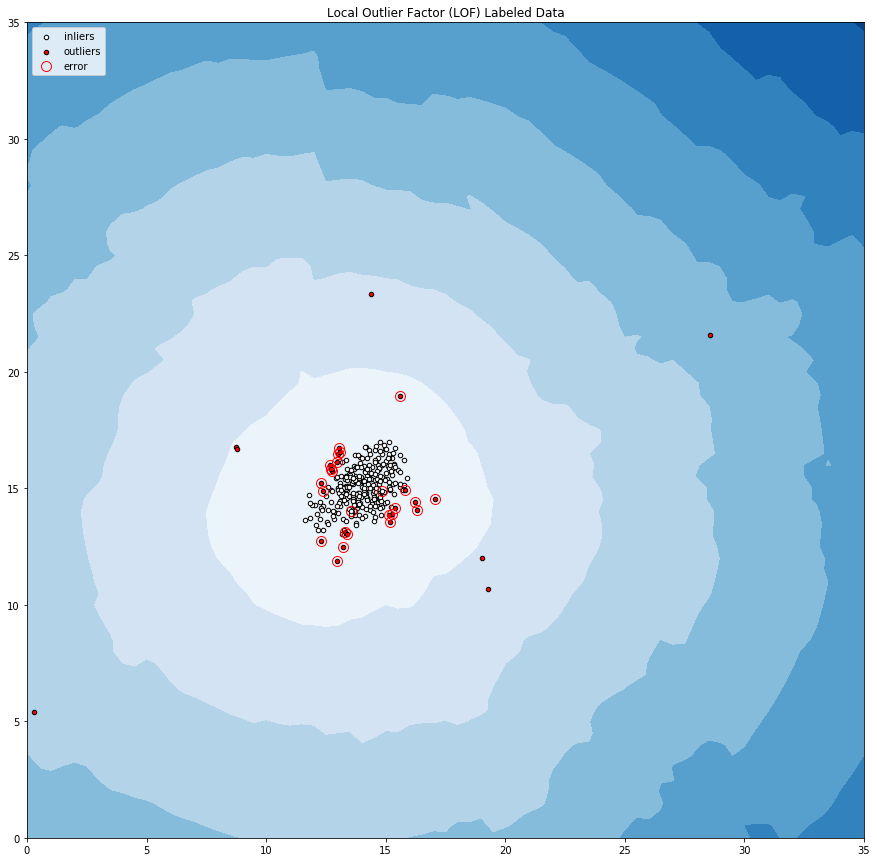

In [31]:
# run against labeled  data
run_cross_validation()

Number of inliers=  276
Number of outliers=  31


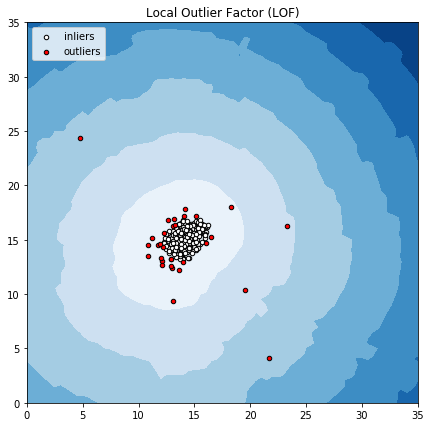

In [27]:
# Run against unlabeled sample data
run_samples()